### notebook purpose

simple demo of our unsupervised mri recon method

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, '../')
from utils.evaluate import scale_0_1

### decide whether to run the network yourself
default: use pre-existing results to save compute time

In [2]:
RUN_NEW = False # generate new output. else load pre-existing results

if RUN_NEW:
    %run -i 'run_demo.py'
    fn_out = 'out'
else:
    fn_out = 'out_pre'

### load images

In [3]:
im_stack = np.empty((4, 320, 320))
fn_list = ['gt', 'zf', fn_out] # filenames

for idx, fn in enumerate(fn_list):
    
    im = np.load('data/{}.npy'.format(fn))
    im_stack[idx] = scale_0_1(im)

# create diff(gt, out)
im_stack[-1] = 2 * np.abs(im_stack[2] - im_stack[0])

### plot

note: parameters are not optimized for image quality in this example

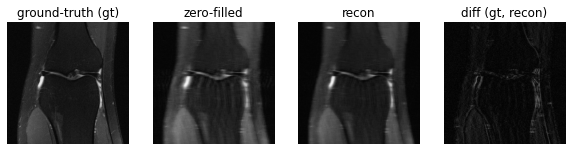

In [4]:
fig = plt.figure(figsize=(10,10))

title_list = ['ground-truth (gt)', 'zero-filled', \
              'recon', 'diff (gt, recon)']
NUM_COLS = len(im_stack)

for idx in range(NUM_COLS):
    
    ax = fig.add_subplot(1, NUM_COLS, idx+1)
    ax.imshow(im_stack[idx], cmap='gray', clim=(0,1))
    ax.set_title(title_list[idx], fontsize=12)
    ax.axis('off')